### 1. Imports

In [23]:
import nltk
from nltk.tag import pos_tag
from IPython.display import display
from spacy import displacy
from nltk.stem import WordNetLemmatizer 
from nltk.stem import *
import spacy
import re
import random
import pickle
import os
import PyPDF2
import warnings
import textract
from autocorrect import Speller
from nltk.tokenize import word_tokenize

### 2. Read documents

Read the pdf using the `PdfFileReader()` function from the PyPDF2 which is a package for extracting document information such as title, author, number of pages, spliting documents page by page, merging page by page, etc. To get the document informtion ussing the `getDocumentInfo()` function and check the number of pages in our document using the `numPages()` function. There are various useful functions one can use to check other things. 

In [24]:
stopwords = nltk.corpus.stopwords.words('english')

In [25]:
filename = 'teste1.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [35]:
a = ind_manifesto.getDocumentInfo()
a['/Title']

'SPE International Symposium & Exhibition on Formation Damage Control'

In [27]:
total_pages = ind_manifesto.numPages
total_pages

5

Loop throug all the pages in the document and extract the text from it. 

The `if` statement check if our document returned words from the loop above using the `extractText()` function. This is done since PyPDF2 cannot read scanned documents.

In [28]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()

### 3. Transform and clean text



If the above returns a false, then run the Optical Character Recognition (OCR) textract to convert scanned/image based Pdf files to text. See textract online documentaion: textract.

Lets print out our texts to see what it contains which was converted to lower case using the `lower()` function.


In [29]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )

In [30]:
def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

spe 115917-pp public perception of the natural gas industry : insights from two barnett shale counties g.l . theodori , sam houston state university copyright 2008 , society of petroleum engineers this paper was prepared for presentation at the 2008 spe annual technical conference and exhibition held in denver , colorado , u sa , 21œ24 september 2008 . this paper was selected for presentation by an spe program committee following review of information contained in an abstract s ubmitted by the author ( s ) . contents of the paper have not been reviewed by the society of petroleum engineers and are subject to correction by the author ( s ) . the material does not necessaril y reflect any position of the society of petroleum engineers , its officers , or members . electronic reproduction , distribution , or storage of any part of this paper without the written consent o f the society of petroleum engineers is prohibited . permission to reproduce in print is restricted to an abstract of n

From the printed text, it's apparent that our text contains unwanted characters such as spaces, punctuations \n and so forth.

Lets break our text phrases into individual words using `word_tokenize()` function from the Naturalge Toolkit (nltk).

In [31]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [32]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell


wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

clean_data = ' '.join(lemmatized_word)
print(clean_data)

spe public perception natural gas industry insight two barnett shale county theodori sam houston state university copyright society petroleum engineer paper prepared presentation spe annual technical conference exhibition held denver colorado u sa september paper selected presentation spe program committee following review information contained abstract ubmitted author content paper reviewed society petroleum engineer subject correction author material necessaril reflect position society petroleum engineer officer member electronic reproduction distribution storage part paper without written consent f society petroleum engineer prohibited permission reproduce print restricted abstract word illustration may copied abstract must contain conspicuous acknowledgment spe copyright abstract data collected general population survey random sample individual two county located barnett shale region texas used empirically explore issue associated public perception natural gas industry moderate sup

Save the data into a DF.

In [33]:
import pandas as pd

In [39]:
b = a['/Title']
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = [b]
df

,script
SPE International Symposium & Exhibition on Formation Damage Control,spe public perception natural gas industry ins...


The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)



Applt the document-term matrix which is a mathematical matrix which decribes the frequency of words in a document


In [41]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,abstract,access,according,achieved,acknowledgement,acknowledgment,act,activity,added,additionally,...,ﬁin,ﬁj,ﬁn,ﬁnatural,ﬁsomewhat,ﬁstrongly,ﬁsweet,ﬁthe,ﬁtoo,ﬁvery
SPE International Symposium & Exhibition on Formation Damage Control,4,1,1,1,1,1,1,3,1,1,...,4,1,1,5,1,2,1,1,1,3


In [42]:
data = data_vect_feat.transpose()
data

,SPE International Symposium & Exhibition on Formation Damage Control
abstract,4
access,1
according,1
achieved,1
acknowledgement,1
...,...
ﬁstrongly,2
ﬁsweet,1
ﬁthe,1
ﬁtoo,1


In [43]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 100 words written in the pdf
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

key SPE International Symposium & Exhibition on Formation Damage Control, value [('gas', 71), ('industry', 61), ('county', 60), ('natural', 58), ('energy', 26), ('development', 22), ('johnson', 20), ('wise', 19), ('area', 17), ('level', 16), ('operator', 16), ('perception', 15), ('drilling', 15), ('respondent', 15), ('right', 14), ('mineral', 13), ('survey', 13), ('statement', 12), ('variable', 11), ('likely', 11), ('resident', 11), ('public', 10), ('local', 9), ('multivariate', 9), ('result', 9), ('individual', 9), ('questionnaire', 8), ('perceptual', 8), ('resource', 8), ('negative', 8), ('bivariate', 8), ('household', 8), ('spe', 8), ('ownership', 8), ('tie', 7), ('mean', 7), ('data', 7), ('business', 7), ('better', 7), ('long', 7), ('oil', 7), ('residence', 7), ('barnett', 6), ('sure', 6), ('study', 6), ('agree', 6), ('sample', 6), ('item', 6), ('friendly', 6), ('people', 6), ('run', 6), ('company', 6), ('use', 6), ('environmentally', 6), ('site', 6), ('shale', 6), ('society', 5), 

We will try to get the top most common 100 words from our document and plot that into a wordcloud for visualization.

In [45]:
from collections import Counter

# Let's first pull out the top 100 words for each
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:15])

['gas', 'industry', 'county', 'natural', 'energy', 'development', 'johnson', 'wise', 'area', 'level', 'operator', 'perception', 'drilling', 'respondent', 'right']


Text(0.5, 1.0, 'Top most common 100 words from this paper')

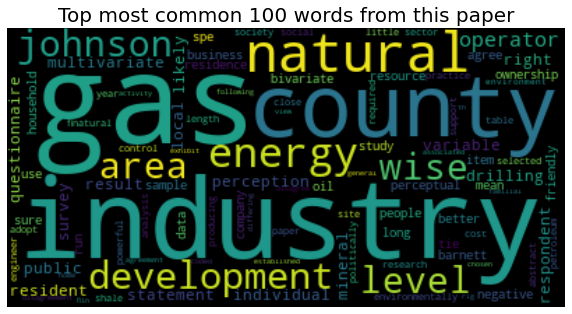

In [49]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from this paper",fontsize=20)

This is a set of Natural Language Processing (NLP) technique of analysing, identifying and categorizing opinions expressed in a piece of text, in order to determine whether the writer's attitude towards a particular topic, product, politics, services, brands etc. is positive, negative, or neutral. This data holds immense value in the fields of marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service, for example.

In [50]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

TextBlob function - returns two properties

- Polarity: a float value which ranges from [-1.0 to 1.0] where 0 indicates neutral, +1 indicates most positive statement and -1 rindicates most negative statement.

- Subjectivity: a float value which ranges from [0.0 to 1.0] where 0.0 is most objective while 1.0 is most subjective. Subjective sentence expresses some personal opinios, views, beliefs, emotions, allegations, desires, beliefs, suspicions, and speculations where as objective refers to factual information.


We can see that the polarity is 0.1 which means that the document is neutral and 0.45 subjectivity refers almost factual information in the document rather than public opinions, beliefs and so forth.

In [51]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.10858939535410131, subjectivity=0.45715718105424075)